# 책, Pytorch 로 시작하는 딥러닝
- 책, `pytorch 로 시작하는 딥러닝` 을 읽고 정리한 내용입니다.

In [1]:
import torch
import numpy as np
from PIL import Image
torch.__version__

%matplotlib inline

## 1. Tensor 의 유형
- 스칼라 (0차원 텐서)
- 벡터 (1차원 텐서)
- 행렬 (2차원 텐서)
- 3차원 텐서
- 4차원 텐서
- 5차원 텐서
- GPU 지원 텐서

### 1-1. 스칼라 (0차원 텐서)
- 1개 요소만을 갖는 텐서를 스칼라 Scala 라고 한다.

In [2]:
x = torch.tensor(10)
print(x)
print("x 의 dimension 차원", x.dim())
print("x 의 size", x.size())

tensor(10)
x 의 dimension 차원 0
x 의 size torch.Size([])


### 1-2. 벡터 (1차원 텐서)
- 벡터는 요소의 배열이다. 지난 주의 평균 온도를 벡터에 저장할 수 있다.

In [3]:
temp = torch.FloatTensor([23, 24, 24.5, 26, 27, 27.2, 23.0])
print(temp)
print("temp 의 dimension 차원", temp.dim())
print("temp 의 size", temp.size())

tensor([23.0000, 24.0000, 24.5000, 26.0000, 27.0000, 27.2000, 23.0000])
temp 의 dimension 차원 1
temp 의 size torch.Size([7])


### 1-3. 행렬 (2차원 텐서)
- torch 모듈은 numpy 배열을 torch 의 Tensor 로 변환하는 from_numpy() 유틸리티 함수를 제공한다.

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_tensor = torch.from_numpy(boston.data)
print(boston_tensor.size())

torch.Size([506, 13])


### 1-4. 3차원 텐서
- 여러 행렬을 결합해 1개의 3차원 텐서를 만들 수 있다.
- 3차원 텐서는 이미지 같은 데이터를 표현할 때 사용된다. 이미지는 여러 행렬이 함께 쌓여 있는 형태로 표현된다.
- 이미지의 형상이 224, 224, 3 이라면, 첫번째 인덱스는 이미지의 높이, 두 번째 인덱스는 이미지의 폭을 나타낸다. 마지막 인덱스틑 이미지의 채널을 나낸다.

In [5]:
me = np.array(Image.open('./sample_my_img.jpg').resize((224, 224)))
me_tensor = torch.from_numpy(me)
me_tensor.size()

torch.Size([224, 224, 3])

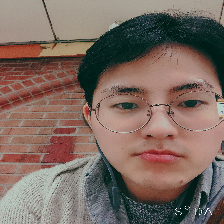

In [6]:
Image.fromarray(me)

/Users/emjayahn/.pyenv/versions/3.7.0/envs/pytorch/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['AppleMyungjo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


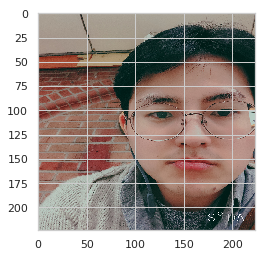

In [7]:
plt.imshow(me)

### 1-5. 텐서 슬라이싱 ( 텐서 자르기 )
- Tensor 객체의 가장 일반적인 작업 중 하나는 Tensor x객체를 잘라 작은 Tensor 객체를 만드는 것이다. 첫 번째 예제는 1차원 Tensor 객체인 sales 에서 첫번째 5개 요소를 선택하는 것이다.
- Tensor 객체를 자르는 표기법 으로는 sales[:slice_index] 를 사용한다.
- 여기서 slice_index 는 Tensor 객체를 자르길 원하는 위치 인덱스이다.

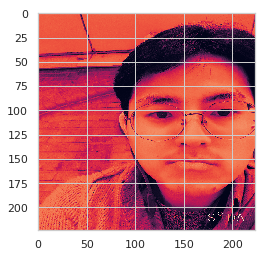

In [8]:
plt.imshow(me_tensor[:, :, 0].numpy())

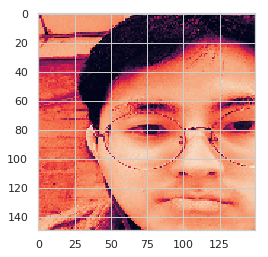

In [9]:
plt.imshow(me_tensor[25:175, 50:200, 0].numpy())

In [10]:
sales = torch.eye(3, 3)
sales

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [11]:
sales[0,0]

tensor(1.)

### 1-6. 4차원 텐서
- 4차원 텐서 타입을 사용하는 대표적인 예는 이미지 배치.
- 한 번에 1개 이미지를 처리하는 방식보다 여러 이미지를 배치로 묶어 처리하는 방식이 더 일반적이다.
- 배치 크기는 여러가지 요소에 영향을 받기 때문에 배치 크기를 결정하는 것은 간단하지 않다.
- 큰 배치 크기 또는 데이터셋 전체 사용에 대한 가장 중요한 제약은 GPU 메모리 크기다.
- 일반적으로 사용되는 배치 크기는 16, 32, 64이다.


In [12]:
a = np.array([[2, 2], [2, 3]])

In [14]:
a

array([[2, 2],
       [2, 3]])

### 1-7. 5차원 텐서
- 5차원 텐서를 사용하는 일반적인 예는 동영상 데이터다.
- 동영상 데이터는 프레임으로 분할 된다.
- 예를 들어 30초 동영상은 30개 프레임을 갖는다면, 이 동영상 데이터는 형상이 (1 x 30 x 244 x 244 x 3) 인 텐서로 표현된다.
- 이런 동영상들의 배치는 형상이 32 x 30 x 244 x 244 x 3
- 여기서 30은 1개 비디오 클립의 프레임 수, 32는 배치에 포함된 동영상 클립의 수

### 1-8 GPU 지원 Tensor
- 파이토치는 `cuda()`라는 함수를 제공.
- 이 함수는 CPU에서 동작하는 Tensor 객체를 복사해, GPU 에서 동작하는 Tensor 객체를 새로 만든다.

In [18]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
print(a)
print(b)

tensor([[0.5857, 0.9061],
        [0.1544, 0.2571]])
tensor([[0.6407, 0.7114],
        [0.9777, 0.1916]])


In [19]:
c = a + b
print(c)

tensor([[1.2264, 1.6175],
        [1.1321, 0.4487]])


In [20]:
d = torch.add(a, b)
print(d)

tensor([[1.2264, 1.6175],
        [1.1321, 0.4487]])


In [21]:
# 인라인 덧셈
a.add_(5)

tensor([[5.5857, 5.9061],
        [5.1544, 5.2571]])

In [23]:
a

tensor([[5.5857, 5.9061],
        [5.1544, 5.2571]])

In [24]:
a * b

tensor([[3.5788, 4.2016],
        [5.0394, 1.0071]])

In [25]:
a.mul(b)

tensor([[3.5788, 4.2016],
        [5.0394, 1.0071]])

In [27]:
a.add(5)

tensor([[10.5857, 10.9061],
        [10.1544, 10.2571]])

In [29]:
# 인라인 곱셈
a.mul_(b)

tensor([[3.5788, 4.2016],
        [5.0394, 1.0071]])

In [30]:
a

tensor([[3.5788, 4.2016],
        [5.0394, 1.0071]])

###  CPU 동작 곱셈연산 vs GPU 동작 곱셈 연산

In [34]:
%%time
a = torch.rand(10000, 10000)
b = torch.rand(10000, 10000)
a.matmul(b)

CPU times: user 1min 3s, sys: 400 ms, total: 1min 3s
Wall time: 6.84 s


In [35]:
a = a.cuda()

AssertionError: Torch not compiled with CUDA enabled